This dataset can use to complete predictive maintenance. The goal is to find patterns that
can help predict and ultimately prevent failures. 

### Preprocessing data

In [20]:
import pandas as pd
import numpy as np
# we will make timestamp becoma index
sensor = pd.read_csv("../input/pump-sensor-data/sensor.csv", index_col= 'timestamp',parse_dates=["timestamp"])

# we drop Unnamed because it doesn't effect another data. it just has a function of numbering
# the DataFrame have 2 axis, there are axis=0 (row) and axis=1(coloumn). an axis is dimensional
sensor.drop(['Unnamed: 0'], axis=1, inplace=True)

sensor.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [22]:
# we will check if there is a sensor which has missing data
sensor.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 53 columns):
sensor_00         210112 non-null float64
sensor_01         219951 non-null float64
sensor_02         220301 non-null float64
sensor_03         220301 non-null float64
sensor_04         220301 non-null float64
sensor_05         220301 non-null float64
sensor_06         215522 non-null float64
sensor_07         214869 non-null float64
sensor_08         215213 non-null float64
sensor_09         215725 non-null float64
sensor_10         220301 non-null float64
sensor_11         220301 non-null float64
sensor_12         220301 non-null float64
sensor_13         220301 non-null float64
sensor_14         220299 non-null float64
sensor_15         0 non-null float64
sensor_16         220289 non-null float64
sensor_17         220274 non-null float64
sensor_18         220274 non-null float64
sensor_19         220304 non-null float64
sensor_20         22

In [23]:
# we will drop sensor 15 cause the sensor is a zero data or missing data
sensor.drop('sensor_15',axis=1,inplace=True)
# we change the status of machine_status to category
sensor["machine_status"]=sensor.machine_status.astype("category")

In [24]:
sensor.machine_status.dtype

CategoricalDtype(categories=['BROKEN', 'NORMAL', 'RECOVERING'], ordered=False)

In [38]:
# we will figureout NaN values 
sensor['sensor_00'].isna().sum()

10208

In [39]:
sensor['sensor_50'].isna().sum()

77017

In [41]:
# we will use the method to fill the missing values
sensor = sensor.fillna(method='ffill')

In [42]:
# check what the condition of every sensor
sensor['machine_status'].unique()
sensor['machine_status'].value_counts()

1    205836
2     14477
0         7
Name: machine_status, dtype: int64

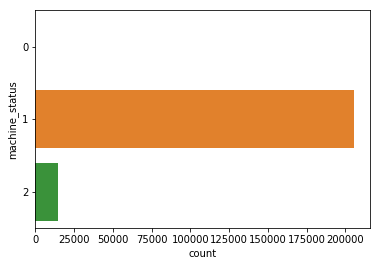

In [43]:
# we will visualization the data of machine_status
import seaborn as sns
sns.countplot(y = sensor['machine_status'])

In [44]:
# we will check the summary of the data
sensor.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,2.281158,47.597254,50.867093,43.752337,590.664106,73.394872,13.209623,15.498316,14.872618,14.491819,...,43.879263,42.656415,43.094291,48.017908,44.340380,150.886798,57.119821,468.549868,258.266994,1.065677
std,0.585413,3.302558,3.667314,2.418979,144.042134,17.301042,2.901954,3.152707,2.956980,2.956122,...,11.043951,11.575867,12.836955,15.640575,10.441987,82.243950,19.143759,393.067670,228.890462,0.247846
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779,0.000000
25%,2.419155,46.310760,50.390620,42.838539,626.620400,69.976258,13.317420,15.856480,15.147570,15.010130,...,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.581000,180.555600,1.000000
50%,2.455556,48.133680,51.649300,44.227428,632.638916,75.576430,13.628470,16.167530,15.451390,15.082470,...,42.968750,40.509260,40.219910,44.849540,42.245370,138.020800,52.662040,222.511600,199.942100,1.000000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,15.118630,...,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,1000.000000,223.090300,1.000000
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000,2.000000


We will see what make the device breaking down

In [45]:
# apply label encoder to encode the machine status
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sensor['machine_status'] = le.fit_transform(sensor['machine_status'])
sensor['machine_status'].value_counts()

1    205836
2     14477
0         7
Name: machine_status, dtype: int64

In [46]:
#  look on complete data frame when device is broken
sensor_broken = sensor[sensor.machine_status ==0]
sensor_broken

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,...,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.6528,0
2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,...,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.7384,0
2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,...,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.5231,0
2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,...,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.3611,0
2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,...,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,1000.0000,0
2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.7685,0
2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,1000.000000,205.7292,0


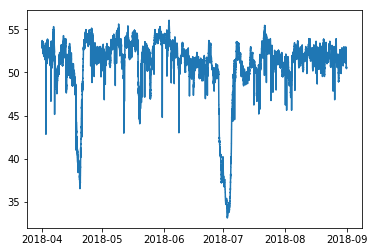

In [47]:
import matplotlib.pyplot as plt 
plt.plot(sensor['sensor_02'])

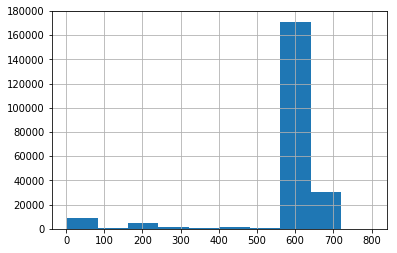

In [48]:
# imputation for null values 
sensor['sensor_04'].hist()
# data is skewwed so we need to use median value to fill the data

In [49]:
X = sensor.drop(['machine_status'], axis=1)
X.shape

(220320, 51)

In [50]:
Y = sensor['machine_status']
Y.shape

(220320,)

In [51]:
# apply the logitic regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = 123)

In [52]:
# apply to the data
logit = LogisticRegression()
model = logit.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [53]:
# predict
y_pred = model.predict(X_test)

In [54]:
# evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
cm

Predicted,1,2,All
True,,,
0,1,1,2
1,61589,127,61716
2,58,4320,4378
All,61648,4448,66096


In [55]:
# accuracy is not a good metrics for Anomaly detection and imblaanced dataset
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9971707818930041

In [56]:
# Classification Report
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00     61648
           2       0.99      0.97      0.98      4448

    accuracy                           1.00     66096
   macro avg       0.66      0.66      0.66     66096
weighted avg       1.00      1.00      1.00     66096



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


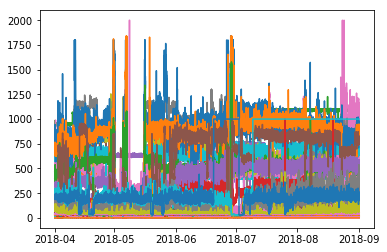

In [58]:
plt.plot(sensor)

In [ ]:
sensor.shape

In [59]:
sensor1 = sensor.copy()
sensor1 = sensor[(sensor1.machine_status ==1) | (sensor1.machine_status ==0)]
sensor1.shape

(205843, 52)